In [1]:
import pandas as pd
from xgboost import XGBRegressor
from function import split_data

# 读取数据
data = pd.read_csv("../data/dataset.csv")
X_train, X_test, y_train, y_test = split_data(data)

# 训练XGBoost回归模型
xgb = XGBRegressor(n_estimators=280,
                   learning_rate=0.09,
                   subsample=0.64,
                   gamma=0.3,
                   max_depth=18,
                   min_child_weight=9,
                   reg_alpha=0.5,
                   colsample_bytree=0.8,
                   colsample_bylevel=0.6,
                   colsample_bynode=0.6,
                   random_state=21)
xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

Training data columns: Index(['O', 'N', 'SSA', 'PV', 'RMIC', 'Dap', 'IDperIG', 'M', 'Anion', 'AML',
       'PW', 'CD'],
      dtype='object')
2D PDP 数据已保存到本地


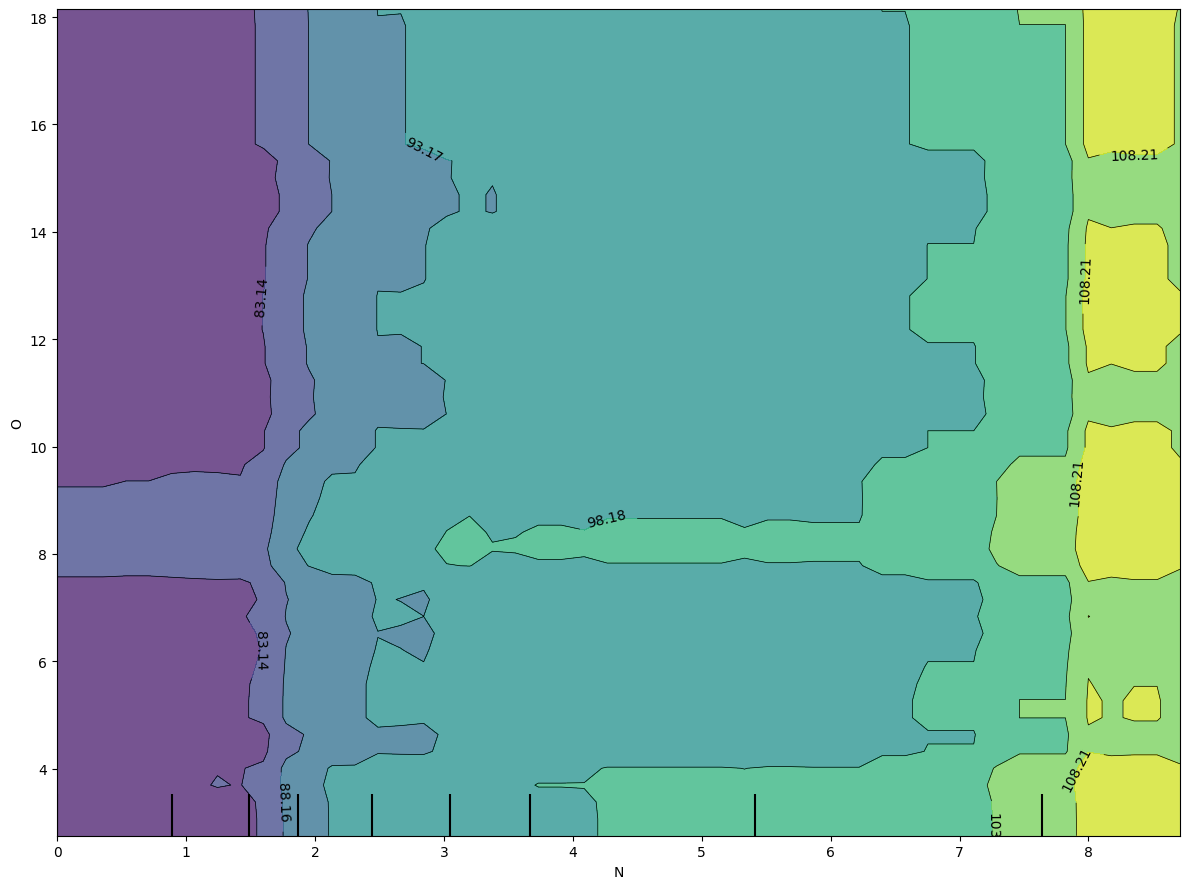

In [2]:
from function import save_2d_pdp
# 指定要计算2D部分依赖图的特征（使用元组而不是列表）
features = ('N', 'O')
savepath = '2D_PDP_N_O.csv'
save_2d_pdp(xgb, X_train, features, savepath)

Training data columns: Index(['O', 'N', 'SSA', 'PV', 'RMIC', 'Dap', 'IDperIG', 'M', 'Anion', 'AML',
       'PW', 'CD'],
      dtype='object')
2D PDP 数据已保存到本地


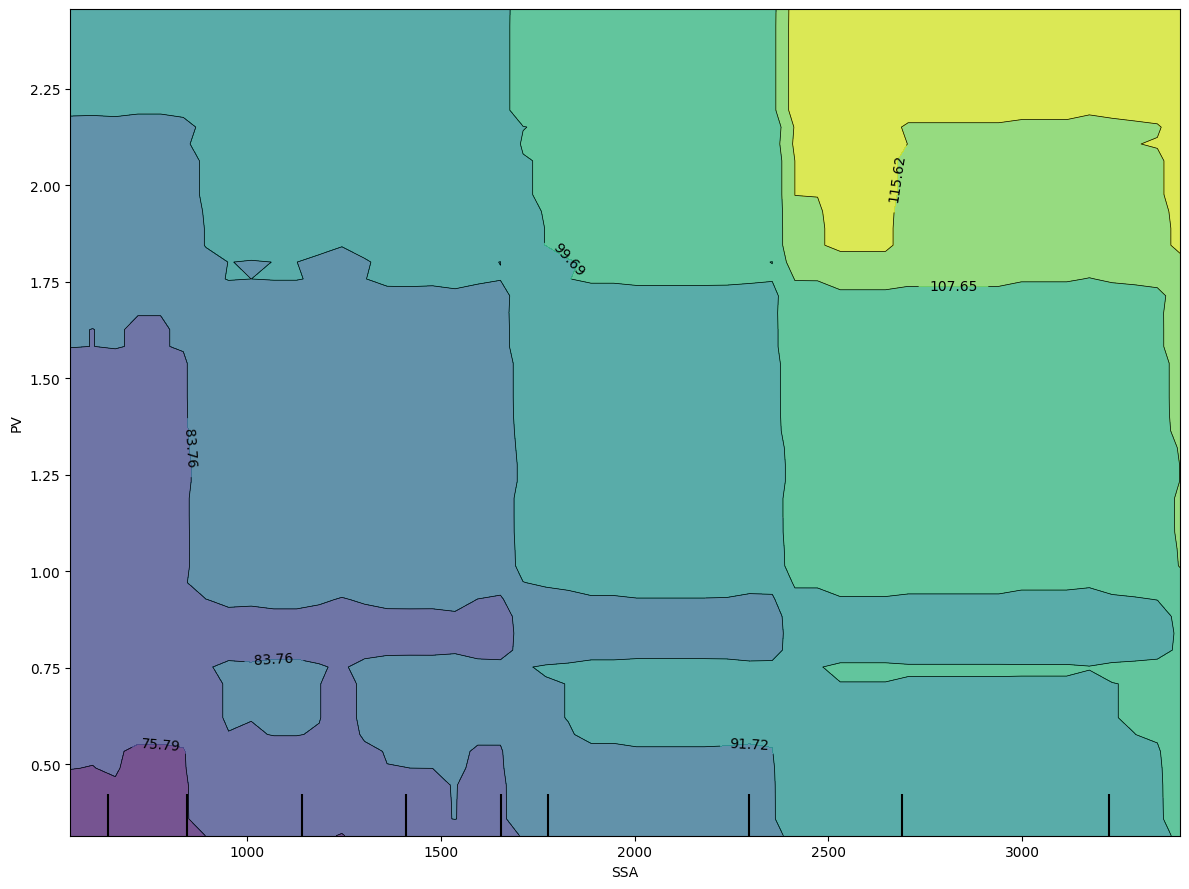

In [3]:
# 指定要计算2D部分依赖图的特征（使用元组而不是列表）
features = ('SSA', 'PV')
savepath = '2D_PDP_SSA_PV.csv'
save_2d_pdp(xgb, X_train, features, savepath)

[array([0.1   , 0.26  , 0.27  , 0.315 , 0.32  , 0.38  , 0.41  , 0.447 ,
        0.448 , 0.5043, 0.54  , 0.55  , 0.551 , 0.575 , 0.5753, 0.58  ,
        0.72  , 0.721 , 0.77  , 0.78  , 0.784 , 0.79  , 0.81  , 0.83  ,
        0.86  , 0.9   , 0.918 , 0.93  , 0.95  , 0.96  , 1.    , 1.03  ,
        1.07  , 1.1   , 1.133 , 1.2   , 1.23  , 1.29  , 1.331 , 1.384 ,
        1.41  , 1.54  , 1.56  , 1.57  , 1.63  , 1.67  , 1.7   , 1.71  ,
        1.74  , 1.75  , 1.77  , 1.81  , 1.93  , 1.953 , 2.071 , 2.14  ,
        2.17  , 2.18  , 2.42  , 2.482 , 2.756 , 3.04  , 3.428 ]),
 array([ 0.        ,  9.2       ,  9.5065312 ,  9.71880762,  9.94749125,
        10.68514519, 10.84337349, 11.11111111, 11.19942197, 14.5631068 ,
        15.11627907, 15.51724138, 15.99516519, 18.87240356, 19.33701657,
        20.48819528, 20.93023256, 20.96168295, 21.68674699, 22.9020979 ,
        26.65379044, 28.98734177, 29.390681  , 30.90909091, 32.62411348,
        32.76836158, 36.84210526, 37.85046729, 38.54166667, 43.77

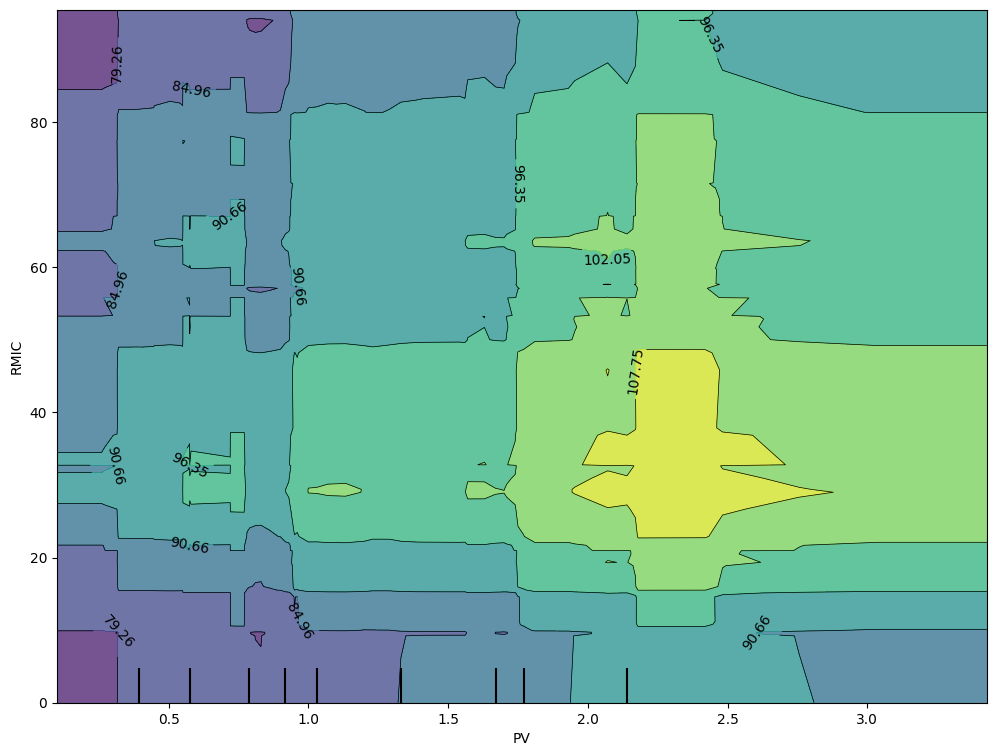

In [12]:
from sklearn.inspection import PartialDependenceDisplay
import numpy as np
from matplotlib import pyplot as plt

# 指定要计算2D部分依赖图的特征（使用元组而不是列表）
features = ('PV', 'RMIC')

fig, ax = plt.subplots(figsize=(12, 9))
pdp_display = PartialDependenceDisplay.from_estimator(xgb, X_train, [features], ax=ax, grid_resolution=100)

# 提取网格值和部分依赖值
grid_values = pdp_display.pd_results[0].grid_values
x_values, y_values = grid_values
average_values = pdp_display.pd_results[0].average

grid_values

In [13]:
average_values

array([[[78.52766 , 78.26761 , 78.11572 , ..., 75.38045 , 77.77519 ,
         77.77519 ],
        [78.52766 , 78.26761 , 78.11572 , ..., 75.38045 , 77.77519 ,
         77.77519 ],
        [78.65147 , 78.39143 , 78.239525, ..., 75.52649 , 77.921234,
         77.921234],
        ...,
        [90.8401  , 90.58922 , 89.86451 , ..., 93.08446 , 93.9561  ,
         93.9561  ],
        [89.86564 , 89.61476 , 88.89005 , ..., 92.04943 , 92.92106 ,
         92.92106 ],
        [89.86564 , 89.61476 , 88.89005 , ..., 92.04943 , 92.92106 ,
         92.92106 ]]], dtype=float32)

In [14]:
# 创建网格值
X_mesh, Y_mesh = np.meshgrid(x_values, y_values)

array([[0.1  , 0.26 , 0.27 , ..., 2.756, 3.04 , 3.428],
       [0.1  , 0.26 , 0.27 , ..., 2.756, 3.04 , 3.428],
       [0.1  , 0.26 , 0.27 , ..., 2.756, 3.04 , 3.428],
       ...,
       [0.1  , 0.26 , 0.27 , ..., 2.756, 3.04 , 3.428],
       [0.1  , 0.26 , 0.27 , ..., 2.756, 3.04 , 3.428],
       [0.1  , 0.26 , 0.27 , ..., 2.756, 3.04 , 3.428]])

In [15]:
# 将数据存储为DataFrame
pdp_2d_data = pd.DataFrame({
    f'{features[0]}': X_mesh.flatten(),
    f'{features[1]}': Y_mesh.flatten(),
    'Partial Dependence': average_values.flatten()
})

# 保存为CSV文件
pdp_2d_data.to_csv('2D_PDP_PV_RMIC.csv', index=False)

# 显示保存路径
print("2D PDP 数据已保存到本地")

# 显示图形
plt.tight_layout()
plt.show()

2D PDP 数据已保存到本地


<Figure size 640x480 with 0 Axes>

Training data columns: Index(['O', 'N', 'SSA', 'PV', 'RMIC', 'Dap', 'IDperIG', 'M', 'Anion', 'AML',
       'PW', 'CD'],
      dtype='object')
2D PDP 数据已保存到本地


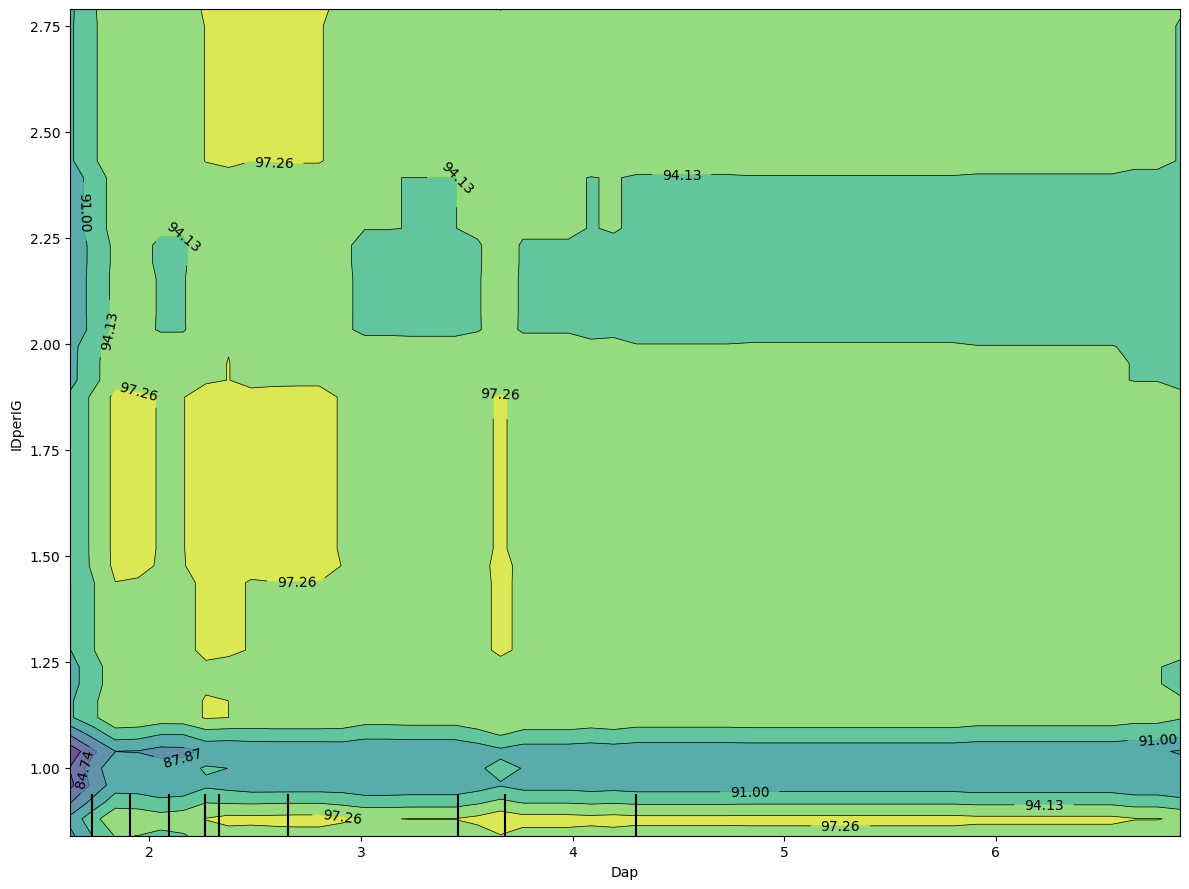

In [7]:
features = ('Dap', 'IDperIG')
savepath = '2D_PDP_SSA_RMIC.csv'
save_2d_pdp(xgb, X_train, features, savepath)

Training data columns: Index(['O', 'N', 'SSA', 'PV', 'RMIC', 'Dap', 'IDperIG', 'M', 'Anion', 'AML',
       'PW', 'CD'],
      dtype='object')
2D PDP 数据已保存到本地


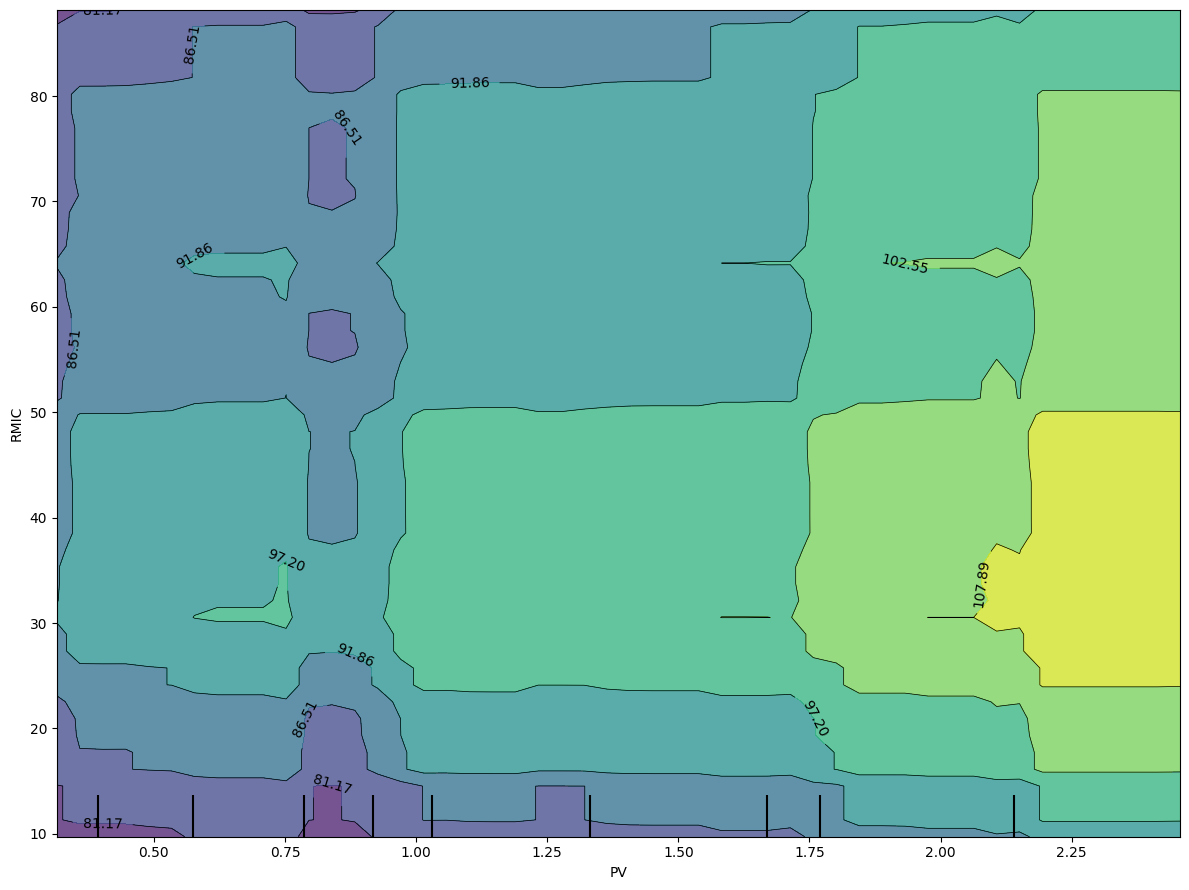

In [8]:
features = ('PV', 'RMIC')
savepath = '2D_PDP_PV_RMIC.csv'
save_2d_pdp(xgb, X_train, features, savepath)